# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.4.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [20]:
harry_potter_df = movies[movies.title.str.contains("harry potter", case=False)]
harry_potter_df = harry_potter_df.sort_values(by=["year"], ascending=False)
print(harry_potter_df)

                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [21]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [22]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [31]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [35]:
len(movies[movies.title == "Hamlet"])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [40]:
print(movies[(movies.title == "Hamlet") & (movies.year > 2000)])
print(movies[movies.title == "Hamlet"].sort_values("year"))

         title  year
1931    Hamlet  2009
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
227953  Hamlet  2011
244747  Hamlet  2017
         title  year
181090  Hamlet  1910
124506  Hamlet  1911
118535  Hamlet  1913
46344   Hamlet  1921
73869   Hamlet  1948
140203  Hamlet  1954
155004  Hamlet  1964
222156  Hamlet  1969
218339  Hamlet  1973
8214    Hamlet  1976
180979  Hamlet  1987
98326   Hamlet  1990
241149  Hamlet  1996
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [46]:
print(len(cast[(cast.title == "Inception") & (cast.n.isnull())]))

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [48]:
print(len(cast[(cast.title == "Inception") & (cast.n.notnull())]))

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [53]:
print(cast[(cast.title == "Inception") & (cast.n.notnull())].sort_values(by=["n"], ascending=True).head(10))

             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [59]:
print(cast[cast.character == "Albus Dumbledore"].title)
print(cast[cast.character == "Albus Dumbledore"].name.unique())

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object
['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [62]:
print(len(cast[cast.name == "Keanu Reeves"].character.unique()))

56


In [66]:
print(len(cast[(cast.name == "Keanu Reeves") & (cast.year > 1999)].character.unique()))

29


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [71]:
print(len(cast[(cast.year >= 1950) & (cast.year <=1960)].character.unique()))

139020


In [72]:
print(len(cast[(cast.year >= 2007) & (cast.year <=2017)].character.unique()))

619945


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [78]:
print(len(cast[(cast.year >=2000) & (cast.n.notnull())].character.unique()))

1062278


In [81]:
print(len(cast[(cast.year >=2000) & (cast.n.isnull())].character.unique()))

382872


In [89]:
print(len(cast[cast.n.isnull()].character.unique()))

601226


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [90]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

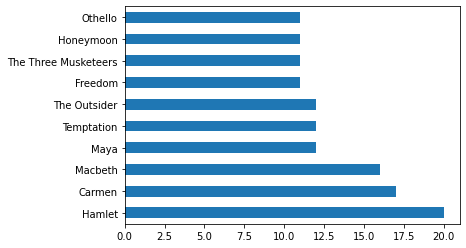

In [91]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [104]:
print(movies[movies.year >= 2000].groupby("year").count().sort_values("title", ascending=False).head(3))

      title
year       
2017  11474
2016   9440
2015   8702


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

year
1890        3
1900       39
1910     6799
1920     9034
1930    10388
1940     8718
1950    12934
1960    17976
1970    19526
1980    21034
1990    22992
2000    39452
2010    75733
2020      285
2110        1
Name: year, dtype: int64


<AxesSubplot:xlabel='year'>

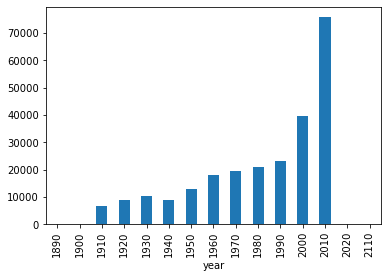

In [114]:
movies_by_decade = movies.groupby((movies["year"]//10)*10)["year"].count()
print(movies_by_decade)
movies_by_decade.plot(kind="bar")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [123]:
print(cast.groupby("character")["character"].count().sort_values(ascending=False).head(10))

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64


In [138]:
print(cast[cast.character == "Herself"].groupby("name")["name"].count().sort_values(ascending=False).head(10))

name
Queen Elizabeth II        12
Joyce Brothers             9
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Marta Berrocal             6
Oprah Winfrey              6
Marilyn Monroe             6
Name: name, dtype: int64


In [139]:
print(cast[cast.character == "Himself"].groupby("name")["name"].count().sort_values(ascending=False).head(10))

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [150]:
print(cast[cast.character.str.startswith("Zombie")].groupby("character")["character"].count().sort_values(ascending=False).head(10))

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64


In [151]:
print(cast[cast.character.str.startswith("Police")].groupby("character")["character"].count().sort_values(ascending=False).head(10))

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:xlabel='year'>

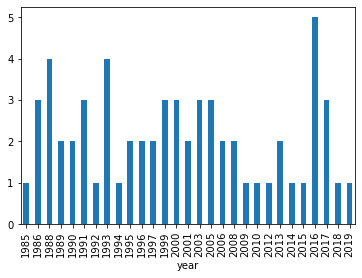

In [157]:
cast[cast.name == "Keanu Reeves"].groupby("year")["name"].count().plot(kind = "bar")

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year'>

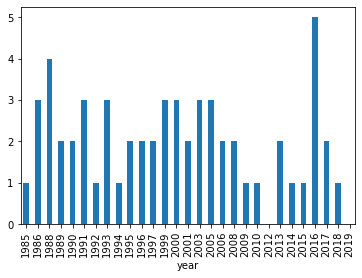

In [166]:
cast[cast.name == "Keanu Reeves"].groupby("year")["n"].count().plot(kind = "bar")

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

year
1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    5
Name: year, dtype: int64


<AxesSubplot:xlabel='year'>

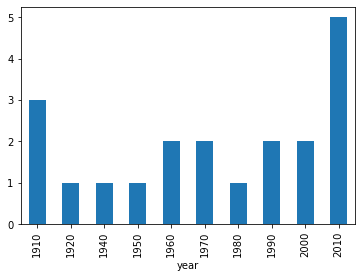

In [168]:
hamlets_by_decade = movies[movies.title == "Hamlet"].groupby((movies["year"]//10)*10)["year"].count()
print(hamlets_by_decade)
hamlets_by_decade.plot(kind="bar")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [174]:
print(cast[(cast.n.notnull()) & (cast.year >= 1960) & (cast.year <= 1969)].groupby("type")["type"].count())

type
actor      89431
actress    41885
Name: type, dtype: int64


In [175]:
print(cast[(cast.n.notnull()) & (cast.year >= 2000) & (cast.year <= 2009)].groupby("type")["type"].count())

type
actor      323238
actress    174609
Name: type, dtype: int64


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [182]:
frank_oz_by_year = cast[cast.name == "Frank Oz"].groupby("year")["year"].count()
frank_oz_by_year = frank_oz_by_year[frank_oz_by_year > 1].sort_index()
print(frank_oz_by_year)

year
1979    8
1980    2
1981    8
1982    2
1983    3
1984    7
1985    4
1992    8
1996    4
1999    8
2005    2
2015    3
Name: year, dtype: int64


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [185]:
frank_oz_by_character = cast[cast.name == "Frank Oz"].groupby("character")["character"].count()
frank_oz_by_character = frank_oz_by_character[frank_oz_by_character > 1]
print(frank_oz_by_character)

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: character, dtype: int64


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

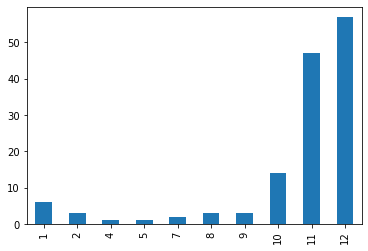

In [186]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

                    title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                   #BKKY  2016     Cambodia 2017-10-12
2                 #Beings  2015      Romania 2015-01-29
3               #Captured  2017          USA 2017-09-05
4  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21


<AxesSubplot:>

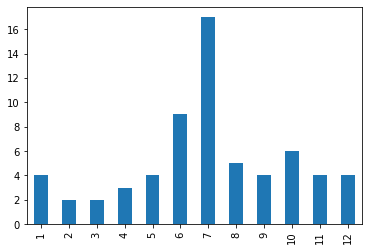

In [187]:
print(release_dates.head())
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

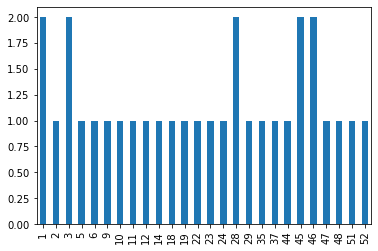

In [189]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [195]:
# print(cast.head())
# print(release_dates.head())
keanu_reeves = cast[(cast.name == "Keanu Reeves") & (cast.n.notnull()) ]
# print(keanu_reeves)
keanu_reeves_releases = pd.merge(keanu_reeves, release_dates, how = "inner", on = "title")
# print(keanu_reeves_releases)
print(keanu_reeves_releases[keanu_reeves_releases.country == "USA"][["title", "name","date"]])

                                  title          name       date
9                              47 Ronin  Keanu Reeves 2013-12-25
48                     A Scanner Darkly  Keanu Reeves 2006-07-28
63                 A Walk in the Clouds  Keanu Reeves 1995-08-11
83           Bill & Ted's Bogus Journey  Keanu Reeves 1991-07-19
92     Bill & Ted's Excellent Adventure  Keanu Reeves 1989-02-17
105                      Chain Reaction  Keanu Reeves 1996-08-02
164                         Constantine  Keanu Reeves 2005-02-18
204                  Dangerous Liaisons  Keanu Reeves 1989-02-24
223                             Dracula  Keanu Reeves 1931-02-14
232                             Dracula  Keanu Reeves 1958-05-08
245                             Dracula  Keanu Reeves 1979-07-20
262                             Dracula  Keanu Reeves 1992-11-13
289         Even Cowgirls Get the Blues  Keanu Reeves 1994-05-20
301                       Exposed (III)  Keanu Reeves 2016-01-22
311                   Fee

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

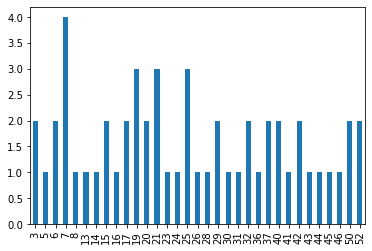

In [198]:
keanu_reeves = cast[(cast.name == "Keanu Reeves") & (cast.n.notnull()) ]
keanu_reeves_releases = pd.merge(keanu_reeves, release_dates, how = "inner", on = "title")
keanu_reeves_releases[keanu_reeves_releases.country == "USA"]["date"].dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

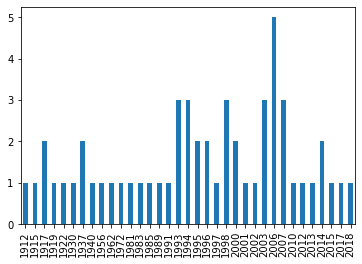

In [199]:
# should make this a function!
ian_mckellen = cast[(cast.name == "Ian McKellen") & (cast.n.notnull()) ]
ian_mckellen_releases = pd.merge(ian_mckellen, release_dates, how = "inner", on = "title")
ian_mckellen_releases[ian_mckellen_releases.country == "USA"]["date"].dt.isocalendar().year.value_counts().sort_index().plot(kind='bar')